In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [85]:
def plot(population, jobs):
    plt.figure()
#     plt.xlim(0, 150)
#     plt.ylim(0, 150)
    plt.scatter(population[:, 0], population[:, 1])
    locations, values = jobs
    for i in range(len(locations)):
        plt.scatter(locations[i][0], locations[i][1], s= 160 - (10*values[i]))


None


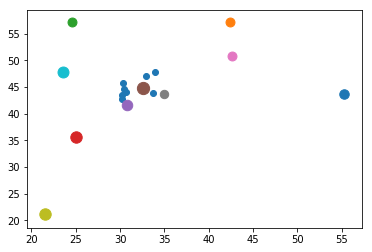

In [86]:
print(plot(population, jobs))

In [87]:
def fitness(population, jobs):
    
    fitness_list = []
    
    locations, values = jobs
    
    for point in population:
        scores = np.sqrt(np.sum((locations - point) ** 2, axis=1))
        best_score = np.min(scores * values)
        fitness_list.append(best_score)

    return fitness_list

In [88]:
def cut(population, jobs, cut=100):
    fit_list = fitness(population, jobs)
    fit_indices = np.argsort(fit_list)[:cut]
    fit_pop = population[fit_indices]
    
    return fit_pop

In [89]:
def cross(population, target=1000):
    
    target_pop = []
    
    for i in range(target):
        first = random.choice(population)
        second = random.choice(population)
        
        target_pop.append(np.array([first[0], second[1]]))
        
    return np.array(target_pop)

In [90]:
def mutation(population, rate=0.1, amount=3):
    indices = np.random.randint(0, len(population), int(len(population)*rate))
    for index in indices:
        population[index] += (np.random.rand(2)*6 - 3)

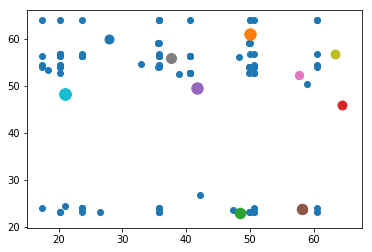

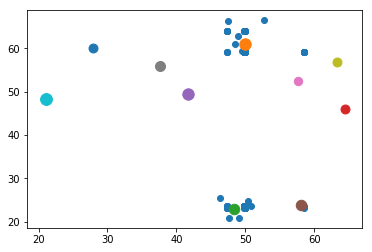

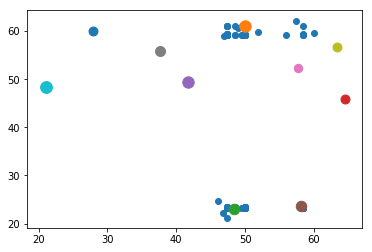

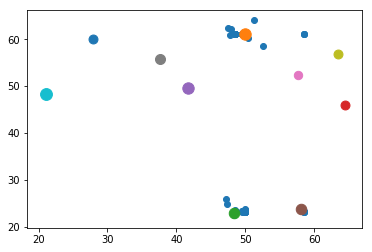

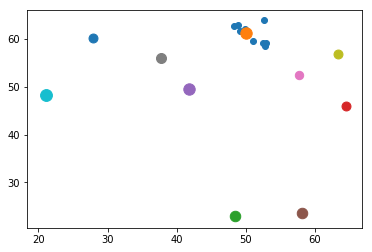

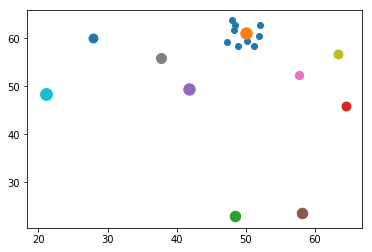

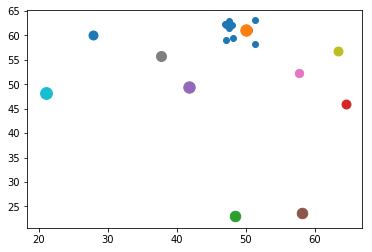

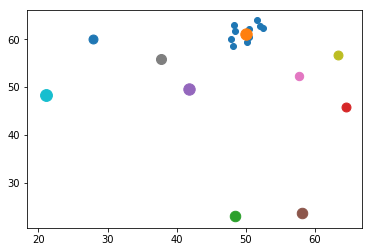

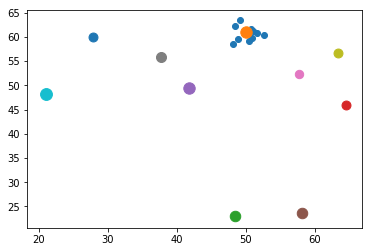

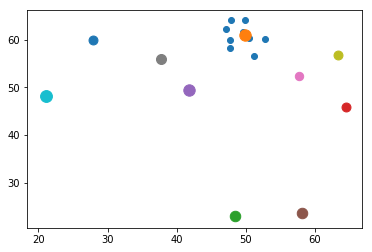

In [91]:
population = np.random.rand(100, 2) * 100
jobs = (np.random.rand(10, 2) * 50 + 20, np.random.randint(1, 10, 10))

for gen in range(10):
    population = cut(population, jobs, cut=10)
    population = cross(population, target=100)
    mutation(population)
    plot(population, jobs)